In [1]:
"""***************************** 19th mar'23 Assignment *****************************"""

"***************************** 19th mar'23 Assignment *****************************"

In [ ]:
Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its
application.

Ans.
    Min-Max scaling, also known as normalization, is a data preprocessing technique used to rescale the feature values of a dataset to a specific range, typically between 0 and 1. It helps to bring all the features to a similar scale, ensuring that no particular feature dominates the others in terms of magnitude.
    
    The formula for Min-Max scaling is:

            scaled_value = (value - min_value) / (max_value - min_value)

        where:
        value is the original value of a feature
        min_value is the minimum value of that feature in the dataset
        max_value is the maximum value of that feature in the dataset
        scaled_value is the rescaled value of the feature within the range [0, 1]


In [15]:
import pandas as pd
import seaborn as sns
df = sns.load_dataset('iris')
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [18]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [22]:
mm.fit(df[['sepal_length','petal_length']])
mm.transform(df[['sepal_length','petal_length']])
mm.transform(df[['sepal_length','petal_length']])[0:5]

array([[0.22222222, 0.06779661],
       [0.16666667, 0.06779661],
       [0.11111111, 0.05084746],
       [0.08333333, 0.08474576],
       [0.19444444, 0.06779661]])

In [ ]:
Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling?
Provide an example to illustrate its application.

The Unit Vector technique, also known as normalization or feature scaling, is a data preprocessing technique used to rescale feature vectors to have a unit norm. In this technique, each feature vector is divided by its magnitude to ensure that the resulting vector has a length of 1. It is particularly useful when the magnitude of the feature vector is irrelevant, and we only want to consider the direction or relative importance of the features.

    The formula for Unit Vector scaling is:

        unit_vector = feature_vector / ||feature_vector||
    where:
    feature_vector is the original vector of feature values
    ||feature_vector|| represents the magnitude or Euclidean norm of the feature vector
    unit_vector is the rescaled vector with a unit norm (length of 1)

In [27]:
import seaborn as sns

df2 = sns.load_dataset('iris')
import pandas as pd
from sklearn.preprocessing import normalize
import pandas as pd
pd.DataFrame(normalize(df2[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]),
            columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

,sepal_length,sepal_width,petal_length,petal_width
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


In [ ]:
Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? 
Provide an example to illustrate its application.

PCA (Principal Component Analysis) is a dimensionality reduction technique used to transform a high-dimensional dataset into a lower-dimensional space while retaining most of the important information. It achieves this by identifying the principal components, which are linear combinations of the original features, capturing the maximum variance in the data. The resulting principal components are orthogonal to each other, meaning they are uncorrelated.


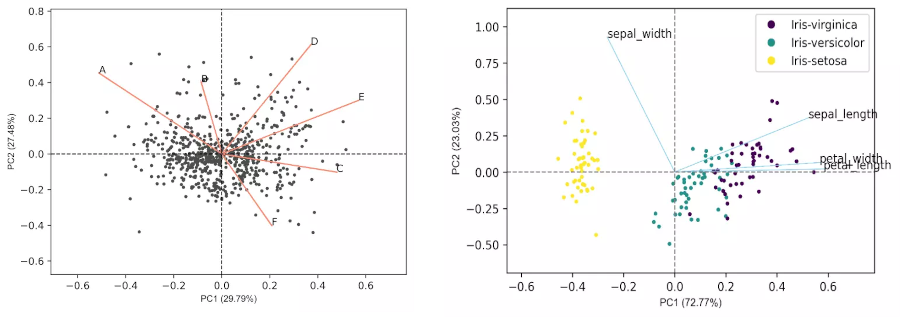

In [11]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
iris = sns.load_dataset('iris')

print('Orignal Dataset :\n',iris.head())
print('\n------------------------------------------------------------------\n')

# extract the feature data
X = iris.drop(labels=['species'],axis=1)
Y = iris[['species']]

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)


# apply PCA with two principal components
pca = PCA(n_components=2)
X_pca = pd.DataFrame(pca.fit_transform(X_scaled),columns=['PC1','PC2'])


print("Variance Ratio:", pca.explained_variance_ratio_)
print('\n')
df_pca = pd.concat([X_pca,Y],axis=1)
df_pca.head()

Orignal Dataset :
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

------------------------------------------------------------------

Variance Ratio: [0.72962445 0.22850762]




,PC1,PC2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


In [ ]:
Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature
Extraction? Provide an example to illustrate this concept.

##### Ans.

Principal Component Analysis (PCA) is a dimensionality reduction technique that can be used for feature extraction. Feature extraction refers to the process of transforming raw data into a lower-dimensional representation while preserving important information.

PCA works by identifying the directions (principal components) in the data that capture the maximum variance. These principal components are orthogonal to each other and are ordered in terms of the amount of variance they explain. By selecting a subset of the principal components, we can effectively reduce the dimensionality of the data while retaining the most significant information.

Example:

1.Data Preparation: First, we collect a dataset of face images and extract high-dimensional feature vectors for each image using a suitable technique (e.g., deep learning-based feature extraction).

2.PCA Calculation: We apply PCA to the standardized feature vectors. PCA calculates the principal components, which are linear combinations of the original features. Each principal component represents a direction in the feature space.

In [ ]:
Q5. You are working on a project to build a recommendation system for a food delivery service. The 
dataset contains features such as price, rating, and delivery time. Explain how you would use
Min-Max scaling to preprocess the data.

In [12]:
import pandas as pd
item = {
    'food_item':['white rice','dum biriyani','nann','noodles'],
    'price':[120,180,75,75],
    'delivery_time':[30,15,10,5]
}

df = pd.DataFrame(item)
df

,food_item,price,delivery_time
0,white rice,120,30
1,dum biriyani,180,15
2,nann,75,10
3,noodles,75,5


In [13]:
# Extract the numerical features
X_num = df[['price','delivery_time']]

# Apply Min-Max scaling to the numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_num),
                        columns=X_num.columns)
X_scaled

,price,delivery_time
0,0.428571,1.0
1,1.000000,0.4
2,0.000000,0.2
3,0.000000,0.0


In [ ]:
Q6. You are working on a project to build a model to predict stock prices. The dataset contains many
features, such as company financial data and market trends. Explain how you would use PCA to reduce 
the dimensionality of the dataset.

##### Ans.
PCA (Principal Component Analysis) is a dimensionality reduction technique that is commonly used to reduce the number of features in a dataset while retaining the most important information. In the context of building a model to predict stock prices, we could use PCA to reduce the dimensionality of the dataset by identifying the most significant features that are driving the stock price movement.


Here is a step-by-step approach to using PCA for this purpose:

1.Standardize the data: The first step is to standardize the data by subtracting the mean and dividing by the standard deviation. This ensures that all features have the same scale and helps to improve the performance of PCA.

2.Compute the covariance matrix: Next, we compute the covariance matrix of the standardized data. The covariance matrix represents the relationships between the different features in the dataset.

3.Compute the eigenvectors and eigenvalues: We then calculate the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the directions in which the data varies the most, while the eigenvalues represent the magnitude of the variation.

4.Select the principal components: We then select the top k eigenvectors with the highest eigenvalues. These eigenvectors are known as the principal components and represent the most important features in the dataset.

5.Project the data onto the principal components: Finally, we project the original data onto the selected principal components to obtain a new, reduced-dimensional dataset. This dataset can then be used as input to a machine learning algorithm to predict stock prices.

In [ ]:
Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to 
transform  the values to a range of -1 to 1.

In [18]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

df1 = np.array([1, 5, 10, 15, 20])
scaler = MinMaxScaler(feature_range=(-1, 1))
data_scaled = scaler.fit_transform(df1.reshape(-1,1))

print(data_scaled.flatten())

[-1.         -0.57894737 -0.05263158  0.47368421  1.        ]


In [ ]:
Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure],
perform Feature Extraction using PCA. How many principal components would you choose to retain, and
why?

##### Ans.
To determine the number of principal components to retain for feature extraction using PCA, several approaches can be employed, such as analyzing the explained variance ratio or examining a scree plot. However, without specific information about the dataset or its characteristics, I can provide a general guideline to help you make an informed decision.

In [51]:
import numpy as np
import pandas as pd

np.random.seed(678)
height = np.random.normal(loc=170, scale=10, size=10000)
weight = np.random.normal(loc=70, scale=10, size=10000)
age = np.random.randint(18, 65, size=10000)
gender = np.random.choice(['Male', 'Female'], size=10000)
blood_pressure = np.random.normal(loc=120, scale=10, size=10000)

data = pd.DataFrame({'Height': height, 
                     'Weight': weight, 
                     'Age': age, 
                     'Gender': gender, 
                     'Blood Pressure': blood_pressure})
data.head(3)

,Height,Weight,Age,Gender,Blood Pressure
0,197.264488,78.301335,37,Male,123.426840
1,181.909333,71.500660,41,Female,103.227835
2,172.938287,86.183821,46,Male,143.637328


In [52]:
# Seperating categorical and numerical variables in data 
cat_cols = list(data.columns[data.dtypes == 'object'])
num_cols = list(data.columns[data.dtypes != 'object'])

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
data_scaled.head()

,Height,Weight,Age,Gender,Blood Pressure
0,2.763392,0.839863,-0.294147,0.99561,0.348117
1,1.212299,0.157775,0.003407,-1.00441,-1.689637
2,0.306094,1.630453,0.375350,0.99561,2.387031
3,1.904781,1.474316,1.044847,-1.00441,-0.667462
4,-0.436947,-0.468415,1.639956,-1.00441,-0.394522


In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pd.DataFrame(pca.fit_transform(data_scaled),columns=['PC1','PC2','PC3'])
# print the variance ratio explained by each principal component
print("Variance Ratio:", pca.explained_variance_ratio_)
X_pca.head()

Variance Ratio: [0.20491989 0.20113817 0.20024048]


,PC1,PC2,PC3
0,0.179922,-1.464986,0.664593
1,-0.536445,-1.423220,1.533594
2,2.149224,0.738165,-0.709998
3,1.316837,-1.776677,1.784522
4,0.597166,-0.539852,0.356913
